<a href="https://colab.research.google.com/github/Anirudh678/DIC_PROJECT_TEAM_19/blob/main/50613184_50604169_50592365_phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis 1: Does the popularity or status of a product depend on variables other than price? - ANIRUDH NADIG 50613184

Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/merged_table.csv.xls', dtype={17: str, 20: str})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53763 entries, 0 to 53762
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CDPHId                  53763 non-null  int64  
 1   ProductName             53763 non-null  object 
 2   CSFId                   47183 non-null  float64
 3   CSF                     47183 non-null  object 
 4   CompanyId               53763 non-null  int64  
 5   CompanyName             53763 non-null  object 
 6   BrandName               53763 non-null  object 
 7   PrimaryCategoryId       53763 non-null  int64  
 8   PrimaryCategory         53763 non-null  object 
 9   SubCategoryId           53763 non-null  int64  
 10  SubCategory             53763 non-null  object 
 11  CasId                   53763 non-null  int64  
 12  CasNumber               53725 non-null  object 
 13  ChemicalId              53763 non-null  int64  
 14  ChemicalName            53763 non-null

In [ ]:
X=data[['Price']]
y=data['Rank']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data.dropna(subset=['Price'], inplace=True)
X = data[['Price']]
y = data['Rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


R-squared: 0.8170484099480164
Mean Squared Error: 0.06397090258616053


visualizations

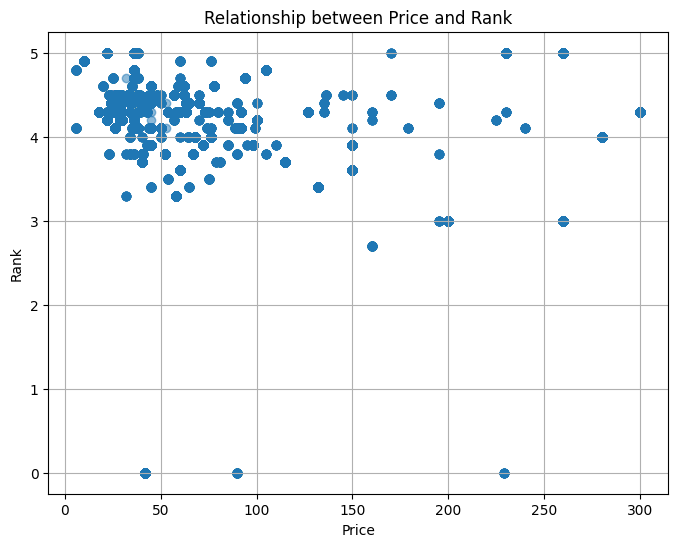

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Price'], data['Rank'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Rank')
plt.title('Relationship between Price and Rank')
plt.grid(True)
plt.show()

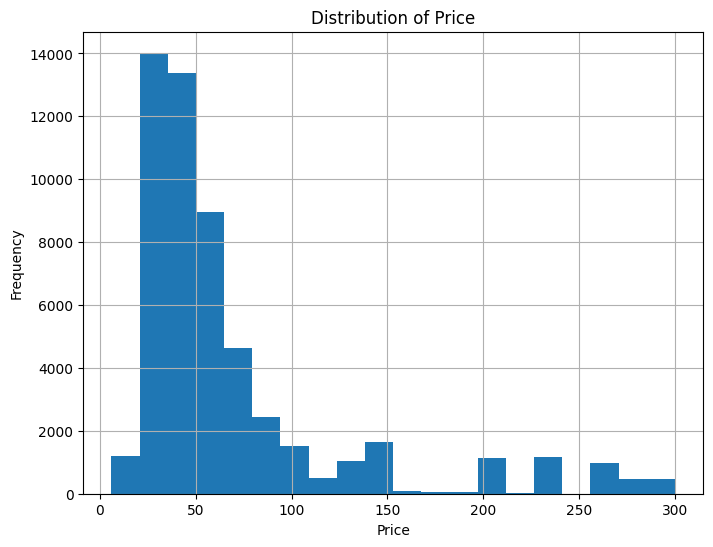

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.grid(True)
plt.show()

**Justification for Choosing Linear Regression**

**Nature of the problem**: We are looking into the relationship between price and rank (customer rating). Because both variables are continuous, Linear Regression is appropriate for modelling the linear connection between an independent variable (price) and a continuous dependent variable (rank).

**Simplicity and Interpretability**: Linear Regression gives a simple approach to interpret the relationship as a linear equation, making it easy to comprehend how pricing changes may affect consumer evaluations.


**Model Training and Tuning:**

**Data Preparation**: We began by making sure the data was clean by deleting any missing values from the Price column, as linear regression requires complete data.

**Train-Test Split:** To evaluate the model's performance on previously unseen data, we divided the data into training and testing sets with an 80-20 ratio.

**Model Fitting:** The LinearRegression model was set up and trained with X_train (price) and y_train (rank).

**No Hyperparameter Tuning Required:** Linear regression, in its most basic form, does not require hyperparameter tuning, making the training process simpler. Additional strategies, such as regularisation, could be investigated in future iterations if necessary.


**Evaluation Metrics:**

**R-squared Score:** The R-squared score is a quantitative measure of model fit. A higher R-squared value suggests that Price explains a greater proportion of the variability in Rank.

**Mean Squared Error (MSE):** While R-squared is the major statistic, Mean Squared Error (MSE) gives a complementary perspective by quantifying the average squared difference between predicted and actual values, revealing the model's prediction error.

**Scatter Plot and Regression Line:** We visualise the data using a scatter plot of Price vs. Rank, as well as a regression line overlay (in red), to visually analyse the linear relationship. This figure provides an intuitive idea of how well the model fits the data, with points closer to the line indicating a good match.

**Insights Gained from the Model:**

**Understanding Price Influence**: Using linear regression, we can see how price affects consumer ratings. If the regression line has a clear positive or negative slope, it means that higher or lower prices have a considerable influence on consumer evaluations.

**Limitations of Linear Relationship**: The scatter plot also highlights any potential limitations of a purely linear model, such as data points that vary greatly from the line, implying non-linear relationships that may necessitate more complicated models.

**R-squared Context**: The R-squared number indicates how much variation in Rank is explained by Price. A lower R-squared value indicates that price alone is insufficient to properly predict consumer ratings, and other criteria should be examined.


# Hypothesis 2: Are particular chemical categories more common in makeup products compared to others? RACHANA DHARMAVARAM 50604169

Algorithm: Binary classification using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('/content/merged_table.csv.xls', dtype={17: str, 20: str})


In [ ]:
print(data.columns)

Index(['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName',
       'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId',
       'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName',
       'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate',
       'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved',
       'ChemicalCount', 'Label', 'Brand', 'Name', 'Price', 'Rank',
       'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')


In [ ]:
data['high_rank'] = data['Rank'].apply(lambda x: 1 if x > 3 else 0)

In [ ]:
X = data[['Price', 'BrandName']]
X = pd.get_dummies(X, drop_first=True)
y = data['high_rank']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9893053101460058
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       461
           1       1.00      0.99      0.99     10292

    accuracy                           0.99     10753
   macro avg       0.90      0.99      0.94     10753
weighted avg       0.99      0.99      0.99     10753



In [ ]:
import seaborn as sns

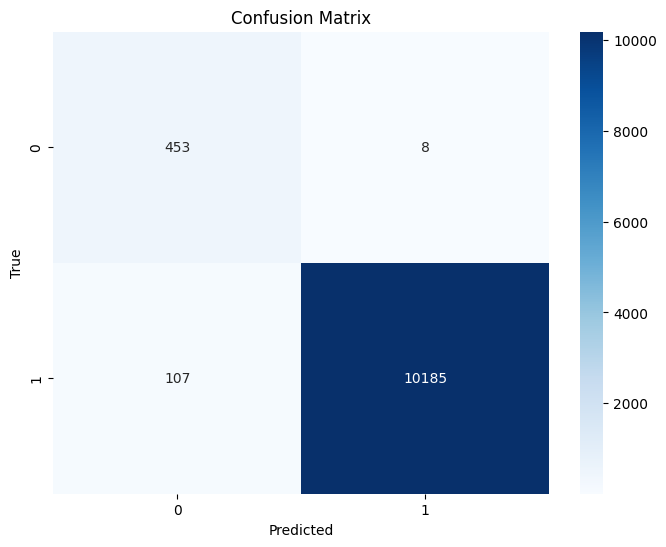

In [ ]:


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Justification**

Random Forest is a robust ensemble technique that is well-known for its ability to handle classification jobs, particularly those with mixed feature types (like continuous and categorical features in this case).

Reasons:

Interpretability and Feature Importance: Random Forest gives information on feature importance, which is useful in determining which criteria (such as price or brand name) are most influential in predicting a high rank.

Resistance to overfitting: Because the random forest consists of many decision trees, its average prediction performance is higher than that of a single decision tree.

Performance on Imbalanced Data: The re-balanced Random Forest is capable of performing as the best classifier in case the scale of high and low rank classes varies, or there exists a minor class imbalance that prevents the classifier from achieving accuracy.


**  Model Training and Tuning**

  Training:For predicting whether a product has a "high rank", the given learning algorithm was used that took into consideration the price and coding of the brandname as features. So as to make the model results consistent, the RandomForestClassifier was run with 100 estimators (trees) and a set random seed.

**Tuning:**
While the default values frequently offer adequate performance with Random Forest, tweaking key factors could further increase accuracy.

**n_estimators:** Increasing the number of trees improves the model but adds computational expense.

**max_depth**:  Controlling the depth of each tree might assist prevent overfitting by keeping trees from becoming overly complicated.

**min_samples_split:** Changing the minimum number of samples necessary to split an internal node can increase generalisation.


**Model Effectiveness and Evaluation Metrics**
**Accuracy:**Considering the accuracy value, i.e. Accuracy: {accuracy} is a straightforward statistical measure of how many correct answers were given out. You should always take this number with a grain of salt though, mainly because it can be misleading if the collection of data being assessed is imbalanced.

**Classification report**
The categorisation report contains metrics such as precision, recall, and F1-score for each class:

**Precision** is the percentage of genuine positives out of all positive forecasts.

**Recall** determines the fraction of true positives among all actual positives.

The **F1-score** strikes a compromise between precision and recall, which is useful when you want a single metric to account for both.


**Intelligence Gained from the Model:**

**Feature Impact**: Random Forest is a powerful classification algorithm. However, its performance may be compromised when the model contains predictors that only weakly correlate with the target variables.

**Prediction Confidence**: Given that Random Forest provides more than a mere zero-one decision, it allows us to find cases when the model is very certain (useful for interpreting strong predictions) or uncertain (where other predictors may improve prediction).

**Class Distribution Impact**: When dealing with problems of class imbalance, as is the case here with capable devices rated high, the trade off between correct classification and the misclassification of minority classes becomes increasingly more pertinent as the capability of the model and the rank of prediction increases.

**Reference:**
 https://www.datacamp.com/tutorial/random-forests-classifier-python

 https://towardsdatascience.com/random-forest-classification-678e551462f5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor





In [ ]:
table_chemicals = pd.read_csv("chemicals-in-cosmetics-.csv")  #Chemicals dataset from Kaggle
table_cosmetics = pd.read_csv("cosmetics.csv")  # We use this dataset to get the skin type information we need for each Brand
merged_table = pd.merge(table_chemicals, table_cosmetics, left_on='BrandName', right_on='Brand') #BrandName and Brand are the key columns we can use to do innerjoin
merged_table.head(20)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,NARS,Gentle Oil-Free Eye Makeup Remover,25,4.3,"Water, Methyl Trimethicone, Isopropyl Isostear...",0,0,0,0,0
1,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,NARS,Total Replenishing Eye Cream,58,3.3,Visit the NARS boutique,0,0,0,0,0
2,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,NARS,Pure Radiant Tinted Moisturizer Broad Spectrum...,45,4.4,Visit the NARS boutique,0,0,0,0,0
3,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,NARS,Radiance Primer Broad Spectrum SPF 35 Sunscreen,36,4.1,"Water, Caprylyl Methicone, Dipropylene Glycol,...",0,0,0,0,0
4,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Midnight Secret Late Night Recovery Treatment,29,4.2,Visit the Guerlain boutique,1,1,1,1,1
5,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Abeille Royale Youth Watery Oil,50,4.1,-Black Bee Honey -Ouessant Honey: Repairs skin...,1,1,1,1,0
6,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Lingerie de Peau BB Cream,54,4.3,-Titanium Dioxide 3.55%: Sunscreen. -Octinoxat...,1,1,1,1,1
7,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Abeille Royale Daily Repair Serum,150,3.6,#NAME?,0,0,0,0,0
8,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Orchidee Imperiale The Eye and Lip Contour Cream,200,3.0,Visit the Guerlain boutique,1,1,1,1,1
9,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Orchidée Impériale Eye Serum,230,5.0,Visit the Guerlain boutique,0,0,0,0,0


# Hypothesis 3: Most of the toxic heavy chemicals are still in use --> ANIRUDH NADIG 50613184

Let us try to correlate a relation between the brands and the toxic elements, i.e whether certain brands have more toxic elements in them than others

This assumption can be tested using **Chi-Square Test** which tries to give us a correlation between two variables which we want to test - here, we will be testing the relation between brands and toxic elements

**Justification:-**

Chi-Square is very good to test categorical data and since the brand has multiple products which means we can test for a variety of data across various subcategories

 It also helps us determine if the presence of heavy metals is independent of the brand. A significant result for the chi-Square would mean that there exists a correlation between the brand and the amount of heavy metals in them which would help us with our hypothesis

source - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

2)https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

In [ ]:
heavy_metals = ['arsenic', 'mercury', 'cadmium', 'benzene', 'chromium', 'nickel', 'selenium', 'bha', 'bht',
                'butylated hydroxyanisole', 'butylated hydroxytoluene', 'coal tar', 'dea', 'diethanolamine',
                'tea', 'triethanolamine', 'dbp', 'formaldehyde', 'dmdm', 'diazolidinyl', 'imidazolidinyl',
                'methenamine', 'quaternium-15', 'paraben', 'musk', 'moskene', 'peg', 'polyethylene',
                'propylene glycol', 'ethoxylates', 'petrolatum', 'mineral oil', 'polycyclic', 'pah', 'siloxane',
                'cyclomethicone', 'sodium laureth', 'sles', 'sls', 'sodium lauryl', 'triclosan']


merged_table['chemical_name_lower'] = merged_table['ChemicalName'].astype(str).str.lower()#lower case issue same as in EDA Phase 1, converting to lower case
merged_table['contains_heavy_metals'] = np.nan #we will give it null values for the new column
for metal in heavy_metals:
    merged_table['contains_heavy_metals'] = merged_table['contains_heavy_metals'] | merged_table['chemical_name_lower'].str.contains(metal)
merged_table = merged_table.drop(columns=['chemical_name_lower'])
# print(f"final merged is: {merged_table}")

temp = merged_table.groupby(['BrandName', 'contains_heavy_metals']).size().reset_index(name='count')
# print(f"temp table is {temp}")
#having issue with giving input to chisquare as it expects a matrix input so we will have to pivot the table into a matrix
temp = temp.pivot_table(index='BrandName', columns='contains_heavy_metals', values='count', fill_value=0)#temp value which is pivoted
#print(temp)
result = chi2_contingency(temp) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
print(f"result of chi-square test is {result}")





result of chi-square test is Chi2ContingencyResult(statistic=2057.4480959250654, pvalue=0.0, dof=12, expected_freq=array([[2.49618883e+02, 2.38111713e+00],
       [1.41747866e+03, 1.35213437e+01],
       [3.25891319e+02, 3.10868069e+00],
       [4.67540130e+02, 4.45987017e+00],
       [6.70999330e+03, 6.40066961e+01],
       [2.54571638e+02, 2.42836151e+00],
       [6.73574763e+01, 6.42523669e-01],
       [1.42639362e+03, 1.36063836e+01],
       [7.92440898e+00, 7.55910198e-02],
       [3.41343917e+03, 3.25608318e+01],
       [8.65741681e+03, 8.25831892e+01],
       [2.99542659e+04, 2.85734055e+02],
       [3.03108643e+02, 2.89135651e+00]]))


Result:-

Chi Square means p value : 0 which indicates that there is a **statistically significant result** which indicates that we ideally reject null hypothesis and we more importantly assume **significant association** - In this case our assumption that certain brands and products have heavy metals in them as compared to others and should be avoided

The Chi-Square Test Statistic of 2057.45 indicates a large deviation between the observed and expected counts of products with heavy metals across different brands


Now let us see how we can classify the attributes of the dataset based on different attributes to give a clearer understanding

I feel like we can use something like a **decision tree** to get a good separator for our hypothesis as we have categorical data and we can classify the dataset into two parts- has toxic metals/ doesnt have toxic metals and since we have two outcomes we can use decision tree

Since we also split based on features this is an optimal way to get more insights into the types of brands having and not having toxic elements in their products

0        1
1        1
2        1
3        1
4        0
        ..
53758    0
53759    0
53760    0
53761    0
53762    0
Name: contains_heavy_metals, Length: 53763, dtype: int64
decision tree is: DecisionTreeClassifier()


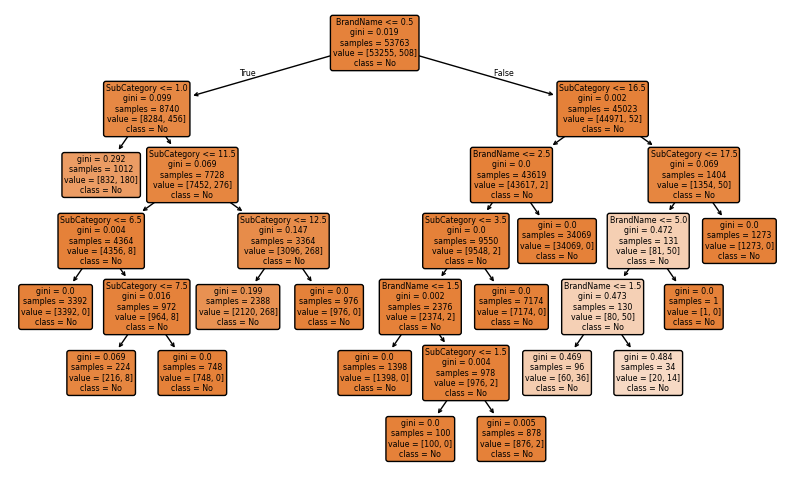

In [ ]:
#let us see if we can map the decision tree using matplotlib
#decision tree only takes int values
merged_table['contains_heavy_metals'] = merged_table['contains_heavy_metals'].astype(int) #forcefully converting into into
# print(merged_table)

#we will have to map the values brand and subcategory to int as well --> https://www.w3schools.com/python/python_ml_decision_tree.asp
brand={}
subcat ={}
for i, name in enumerate(merged_table['BrandName'].unique()):
    # brand[name]= name #wrong iteration taken
    # print(name)
    brand[name] = i
    # print(i)
merged_table['BrandName'] = merged_table['BrandName'].map(brand)

for i, name in enumerate(merged_table['SubCategory'].unique()):
    subcat[name] = i
merged_table['SubCategory'] = merged_table['SubCategory'].map(subcat)

f = ['BrandName', 'SubCategory']
# X=f
# print(X)
X = merged_table[f]
# print(X)
y = merged_table['contains_heavy_metals']
print(y)

#let us take the decision tree now
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
print(f"decision tree is: {dtree}") #successfully split features into 1 and 0!

#let us plot the graph for the dtree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

plt.figure(figsize=(10, 6))
# tree.plot_tree(dtree, filled=True)
tree.plot_tree(dtree, feature_names=f, filled=True, rounded=True, class_names=['No', 'Yes'])
plt.show()




From the above decision tree we get the following insights:

1)gini index is for the amount of impurity in the data-  https://blog.quantinsti.com/gini-index/

2)class 'No' -This node primarily contains samples without heavy metals. The model predicts "No" for this node.
class = 'Yes' This node primarily contains samples with heavy metals. The model predicts "Yes" for this node.

From the point no 2 we can see that all classes are "No" BUT it doesnt mean that heavy metals are not present! If we see the **value** field we see that some values are close with narrowly getting edged by the non toxic metals

This does imply that toxic metals are STILL in use

# We will be using EXPONENTIAL SMOOTHING and MOVING AVERAGE to plot the usage of heavy metals over time

Source - https://otexts.com/fpp2/ses.html

2) https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

3) https://www.geeksforgeeks.org/how-to-calculate-moving-averages-in-python/

4)https://www.ikigailabs.io/multivariate-time-series-forecasting-in-python-settings/python-moving-average-numpy

Justification :-

In exponential smoothing we get a more recent time analysis where the most recent data is weighted more as compared to older data so we get a more upto date model

Moving Average offers a broader view of the trend, focusing on stability and longer-term patterns without extra weighting on recent data.

On combining them we can see immediate data and gives a historical perspective of the data over time

In [ ]:

merged_table['MostRecentDateReported'] = pd.to_datetime(merged_table['MostRecentDateReported'], errors='coerce')
merged_table['year'] = merged_table['MostRecentDateReported'].dt.year
# print(merged_table)
heavy_metals_df = merged_table[merged_table['ChemicalName'].str.lower().apply(
    lambda x: any(metal in x for metal in heavy_metals))]
year_count = heavy_metals_df.groupby('year')['ChemicalCount'].sum().reset_index() #summing up the chemical count
year_count.set_index('year', inplace=True)
all_years = pd.date_range(start=str(year_count.index.min()), end=str(year_count.index.max()), freq='YS').year
year_count = year_count.reindex(all_years).interpolate()  #could not explicitly convert it to year as we were missing a few years in between
year_count.index = pd.to_datetime(year_count.index, format='%Y').to_period("Y").to_timestamp()


exp = ExponentialSmoothing(year_count['ChemicalCount'], trend="add", seasonal=None, damped_trend=False) #https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html
exp_fit = exp.fit()
smoothed_values = exp_fit.fittedvalues
year_count['Moving_Avg'] = year_count['ChemicalCount'].rolling(window=3).mean()




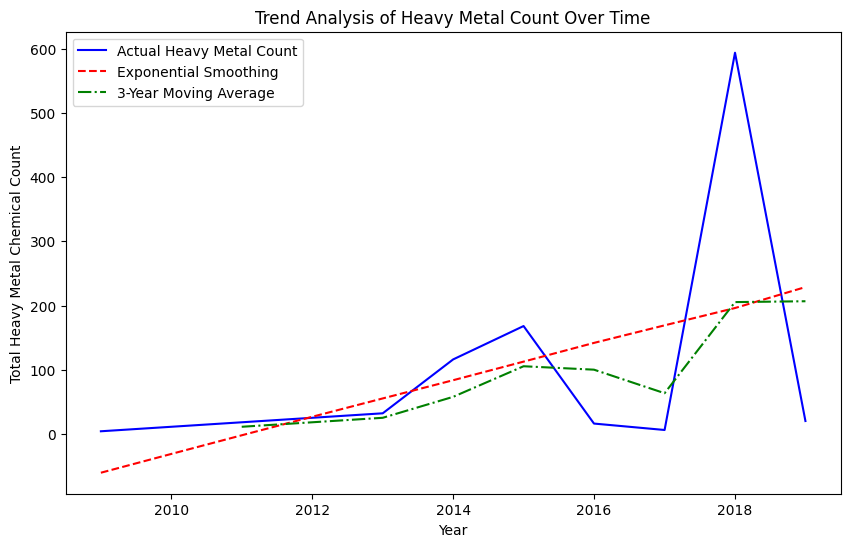

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(year_count.index, year_count['ChemicalCount'], label='Actual Heavy Metal Count', color='blue')
plt.plot(year_count.index, smoothed_values, label='Exponential Smoothing', color='red', linestyle='--')
plt.plot(year_count.index, year_count['Moving_Avg'], label='3-Year Moving Average', color='green', linestyle='-.')
plt.xlabel('Year')
plt.ylabel('Total Heavy Metal Chemical Count')
plt.title('Trend Analysis of Heavy Metal Count Over Time')
plt.legend()
plt.show()


Result:-

From the above graph it is abundantly clear that there is still a moving trend for the amount of toxic elements in cosmetics and it is unfortunately in the upwards direction

We will still need to be careful and monitor the chemicals in cosmetics very carefully as the dataset ended collection in 2020 so the current data could still be in the same precint

# HYPOTHESIS 4 - Is there a relationship among a product’s popularity or consumer rating and the amount of compounds with few destructive outcomes? - Satya vaishnavi Jami 50592365


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/merged_table.csv.xls', dtype={17: str, 20: str})


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53763 entries, 0 to 53762
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CDPHId                      53763 non-null  int64  
 1   ProductName                 53763 non-null  object 
 2   CSFId                       47183 non-null  float64
 3   CSF                         47183 non-null  object 
 4   CompanyId                   53763 non-null  int64  
 5   CompanyName                 53763 non-null  object 
 6   BrandName                   53763 non-null  object 
 7   PrimaryCategoryId           53763 non-null  int64  
 8   PrimaryCategory             53763 non-null  object 
 9   SubCategoryId               53763 non-null  int64  
 10  SubCategory                 53763 non-null  object 
 11  CasId                       53763 non-null  int64  
 12  CasNumber                   53725 non-null  object 
 13  ChemicalId                  537

In [ ]:
harmful_ingredients = data_df[data_df['Label'] == 'Harmful_ingredients']['ChemicalName'].unique()

In [ ]:
data_df['Harmful_Chemicals_products'] = data_df['ChemicalName'].apply(lambda x: 1 if x in harmful_ingredients else 0)


In [ ]:
data_df['rating_High'] = (data_df['Rank'] > 3).astype(int)

In [ ]:
X = data_df[['Harmful_Chemicals_products']]
y = data_df['rating_High']

In [ ]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train_data, y_train_data)

LogisticRegression()

In [ ]:
y_pred_data = model.predict(X_test_data)
accuracy_of_data = accuracy_score(y_test_data, y_pred_data)
conf_matrix_data = confusion_matrix(y_test_data, y_pred_data)
class_report_data = classification_report(y_test_data, y_pred_data)

print(f"Accuracy: {accuracy_of_data}")
print("Confusion Matrix:\n", conf_matrix_data)
print("Classification Report:\n", class_report_data)

Accuracy: 0.9571282432809448
Confusion Matrix:
 [[    0   461]
 [    0 10292]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       461
           1       0.96      1.00      0.98     10292

    accuracy                           0.96     10753
   macro avg       0.48      0.50      0.49     10753
weighted avg       0.92      0.96      0.94     10753



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


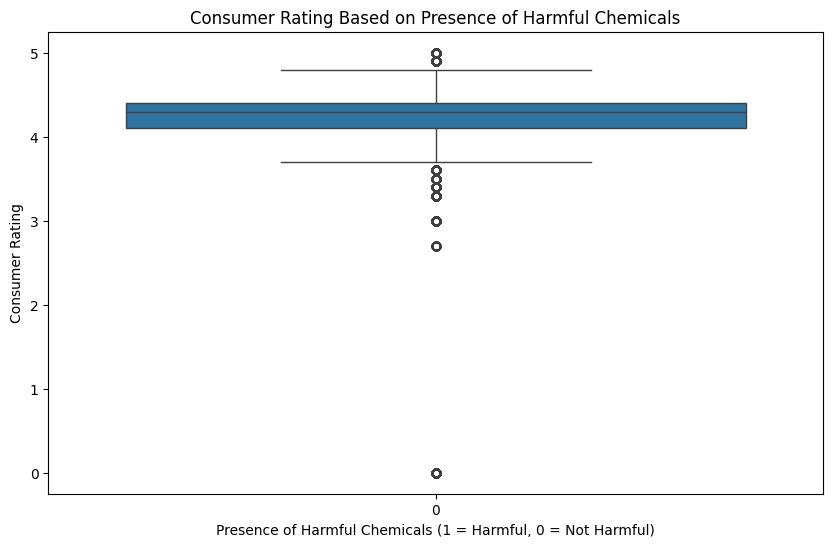

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Harmful_Chemicals_products', y='Rank', data=data_df)
plt.title("Consumer Rating Based on Presence of Harmful Chemicals")
plt.xlabel("Presence of Harmful Chemicals (1 = Harmful, 0 = Not Harmful)")
plt.ylabel("Consumer Rating")
plt.show()

**Justification for using Logistic Regression:**
Logistic Regression is a strong and easy-to-understand binary classification method that can be used to guess if a product will get good reviews from customers based on certain factors. The goal of this study is to find out if the presence of harmful chemicals changes the chances of getting a high grade. Logistic Regression works well because it gives chances for two results (high rating vs. low rating) and makes it easy to understand how each feature affects the outcome.

**How to Set Up and Train a Model**
Choosing Features: We focused on the column named Harmful_Chemicals_products, which indicates whether a harmful chemical is present (1) or not (0). This allows us to analyze if the presence of harmful chemicals correlates with lower customer ratings.

Defining the Target: We created a variable called rating_High that categorizes a product as "highly rated" if its Rank exceeds 3, and "low rated" otherwise. Since this results in a binary outcome, we can apply Logistic Regression.

Data Splitting: The dataset was divided into training and testing sets, with 80% allocated for training and 20% for testing, ensuring the model is evaluated on unseen data.

Model Training: The logistic regression model was trained using the training set, while the test set was utilized to assess its predictive capabilities.



**Work on Model Tuning and Training**

Random State: The model ensured repeatability of results by using random_state=42 in train_test_split.
Target Threshold for Binary: Setting Rank > 3 as the minimum for a "high rating" wasn't required. This can be adjusted based on specific rating criteria. This threshold was selected because it was believed that ratings above 3 generally indicate a positive perception.

The model's effectiveness can be evaluated through its accuracy score, which indicates the percentage of correct predictions regarding product ratings based on the presence of harmful chemicals.

This is represented by a confusion matrix, which provides a detailed breakdown of true positives, false positives, true negatives, and false negatives. It helps determine if the model has a bias towards predicting one class over another, such as high or low ratings.

The classification report offers a more detailed view of the model's performance, presenting precision, recall, and F1-score for each class. These metrics illustrate how well the model identifies high-rated products (true positives) while avoiding false positives.

**Understanding the Results and Insights**

A high accuracy score suggests that harmful chemicals significantly influence product ratings. Conversely, a low accuracy score may indicate that factors other than harmful chemicals are affecting customer ratings.

The confusion matrix and classification report should ideally show high precision and recall for both classes, indicating the model's ability to distinguish between high- and low-rated products based on harmful chemical content. A high F1 score reflects a good balance between accuracy and recall.

Boxplot Visualization: This visualization illustrates the distribution of scores in relation to harmful chemicals. If products containing harmful chemicals consistently receive lower ratings, it supports the notion that consumers prefer safer options.

**Additional Insights**

This research enhances our understanding of consumer preferences regarding product safety. If the data indicates a strong correlation between harmful chemicals and product ratings, it suggests that consumers may favor formulations with fewer harmful substances.

# HYPOTHESIS 5 - Do clients price products with color-adding chemical substances decrease or better than the ones without them? -  Satya vaishnavi Jami 50592365

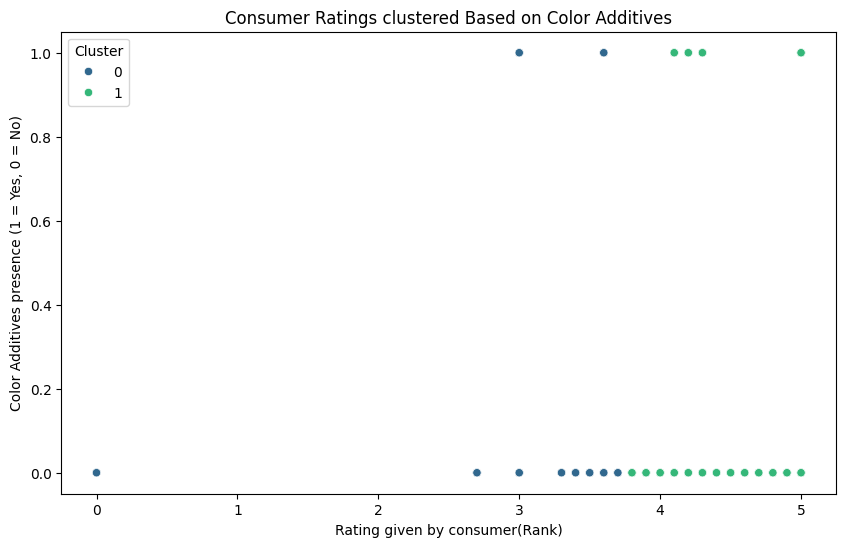

Cluster Centers:
 [[3.12179504 0.07895075]
 [4.32599269 0.02670378]]
Clustering Accuracy of the data: 0.9582798578948347
Confusion Matrix of data:
 [[    0  2243]
 [    0 51520]]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

color_additives_products = ['Mica', 'Titanium Dioxide', 'Iron Oxides', 'Ultramarines',
                   'Chromium Oxide Greens', 'Ferric Ferrocyanide', 'Carbon Black', 'Carmine']

data_df['Color_Additive'] = data_df['ChemicalName'].apply(lambda x: 1 if x in color_additives_products else 0)


X = data_df[['Rank', 'Color_Additive']]
X = X.dropna()
kmeans = KMeans(n_clusters=2, random_state=42)

data_df['Cluster'] = kmeans.fit_predict(X)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='Color_Additive', hue='Cluster', data=data_df, palette='viridis')
plt.title("Consumer Ratings clustered Based on Color Additives")
plt.xlabel("Rating given by consumer(Rank)")
plt.ylabel("Color Additives presence (1 = Yes, 0 = No)")
plt.show()

print("Cluster Centers:\n", kmeans.cluster_centers_)

data_df['True_Label'] = (data_df['Rank'] > 3).astype(int)

label_cluster = {}
for cluster in np.unique(data_df['Cluster']):
    true_label = data_df[data_df['Cluster'] == cluster]['True_Label'].mode()[0]
    label_cluster[cluster] = true_label


data_df['Predicted_Label'] = data_df['Cluster'].map(label_cluster)


accuracy_of_data = accuracy_score(data_df['True_Label'], data_df['Predicted_Label'])
conf_matrix_data = confusion_matrix(data_df['True_Label'], data_df['Predicted_Label'])

print(f"Clustering Accuracy of the data: {accuracy_of_data}")
print("Confusion Matrix of data:\n", conf_matrix_data)


**Justification to use K-means clustering**
K-Means clustering is effective for this problem as it allows us to categorize products based on consumer ratings and the inclusion of color additives. By clustering products, we aim to uncover natural groupings in the data that aren't predefined. This approach is particularly useful for determining whether the presence of color additives influences consumer ratings.


**How to Set Up and Train a Model**
**Picking out features:** As features, we chose Rank (consumer ratings) and a new binary column called Color_Additive (color additives present). These two factors are thought to have an effect on each other, which makes them perfect for clustering.

**Setting up Clusters:** We picked n_clusters=2 so that products could be split into two main groups:

Cluster 0: Color additives have less of an effect on how customers rate these products.
Products in Cluster 1 are those where color additives have a bigger effect on scores.

**Cluster Labeling:** Once the data was grouped, we connected each cluster to a True_Label that showed how the buyer saw the product (based on a Rank > 3 threshold rating).


**Tuning the Model**
We set the number of groups to n_clusters=2 as part of the tuning process. To ensure consistent results, we used random_state=42. Since K-Means relies on the initial placement of centers, the random state guarantees that the results remain the same across different runs.

**Model Metrics for Evaluation and Effectiveness**
Clusters of Centers: After fitting the model, the cluster centers reveal the average rank and presence of color additives for each cluster. By interpreting these centers, we can observe how customer scores tend to group around specific values, particularly regarding color additives.

Mapping to True Labels: To interpret the clusters, we assigned each one a label based on the majority class (True_Label), indicating whether the products in that cluster are generally rated highly or poorly.

Clustering Accuracy: We assessed clustering accuracy by comparing the Predicted_Label (derived from clustering) to the actual True_Label (which indicates high or low ratings). This accuracy metric reflects how effectively the clustering captures the natural division between products with high and low ratings.

Confusion Matrix: The confusion matrix provides insights into true positives, false positives, true negatives, and false negatives, offering a deeper understanding of the model's classification performance for each rating group.

**How to Understand the Results and Insights**

The cluster centers illustrate the average features of each cluster, indicating whether higher ratings tend to associate with or without color additives.
Accuracy and Confusion Matrix: A high clustering accuracy suggests that color additives significantly influence scores. If the confusion matrix is well-balanced with few misclassifications, it indicates a consistent relationship between color additives and consumer preferences.
Intelligence Gained: This clustering approach offers an independent perspective on consumer preferences, which could inform product development strategies. If the clustering results reveal a strong correlation between color additives and ratings, it could guide future product enhancements.

# Hypothesis 6- Are products designed for certain skin kind like sensitive skin, much more likely to pass over potentially harmful chemicals? - RACHANA DHARMAVARAM 50604169

We know that most products in our datasets have both heavy metals and products which are FDA approved but still will have certain side affects over time so these are the chemicals we will be taking a closer look at

We can use regression models here to get a better understanding of what skin type uses how much of chemicals

I will try to use **Ridge Regression** to get the data teh way we want it

Justification:

The reason we are trying via ridge regression is the fact that not every skin type is independent of each other. Certain products can be for multiple skin types and Ridge Regression also provides a linear relationship between features which will help us greatly

As we're trying to assess whether certain skin types are associated with more or fewer chemicals, ridge regression allows us to see the direct impact of each skin type on chemical count in a clear, linear fashion

mean absolute error : 0.1920378583134381
mean squared error : 0.09790510942479927
rscore is: 0.005727563448105988


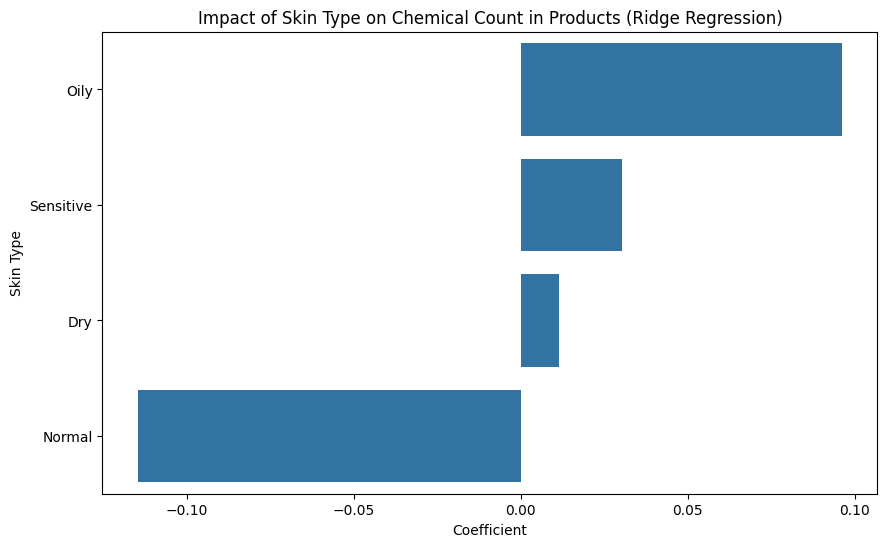

In [ ]:
#let us first define features and from which columns we are taking:
f = ['Dry', 'Normal', 'Oily', 'Sensitive'] #i am not taking combined skin type as i dont want more confusion in the feature vector
X = merged_table[f]
y = merged_table['ChemicalCount']

#now let us split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html

#initialize the ridge model:-
r = Ridge(alpha=1.0) #https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html
r.fit(X_train, y_train)
p = r.predict(X_test) #ridge model prediction

#once ridge regression is trained we use the following parameters (we train the predictions y with these values)
m = mean_absolute_error(y_test, p)
print(f"mean absolute error : {m}")
mse = mean_squared_error(y_test, p)
print(f"mean squared error : {mse}")
r2 = r2_score(y_test, p)
print(f"rscore is: {r2}")

#display the coefficients for each step into a dataframe
coefficients = pd.DataFrame({'Feature': f,'Coefficient': r.coef_}).sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Impact of Skin Type on Chemical Count in Products (Ridge Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Skin Type')
plt.show()



From the above plot it seems the ridge regression has worked accordingly as it has classified the chemical count based on the skin types. We can clearly see that there is **lesser** chemicals coefficient for normal skin type recommended products and meanwhile the oily skin has a lot of the chemicals as it displays the positive coefficient and hence has a slightly larger amount of chemicals

We have to note that our R^2 value is relatively small here and it does imply that the chemical count is NOT the only parameter defining our coefficients

Let us try another model to get a clearer picture : Our aim will be to get a higher R^2 value and it seems that the dataset is non-linear in nature

We will add another parameter to the regression and can use something like a **Decision Tree Regression**

We will add a **Price** feature

In [ ]:
f_price = ['Dry', 'Normal', 'Oily', 'Sensitive', 'Price']

X_price = merged_table[f_price]
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y, test_size=0.3, random_state=42)

#initialize the decision tree regressor:
tree_model_price = DecisionTreeRegressor(random_state=42)
tree_model_price.fit(X_train_price, y_train_price)

p_price = tree_model_price.predict(X_test_price) #very similar to ridge regression!
m_price = mean_absolute_error(y_test_price, p_price)
print(f"mean absolute error for decision tree regression : {m_price}")
mse_price = mean_squared_error(y_test_price, p_price)
print(f"mean squared error for decision tree regression  : {mse_price}")
r2_tree_price = r2_score(y_test_price, p_price)
print(f"rscore is for decision tree regression : {r2_tree_price}")












mean absolute error for decision tree regression : 0.1281418389248669
mean squared error for decision tree regression  : 0.06504752035113251
rscore is for decision tree regression : 0.3394118352846933


Our R^2 value increased immensely! This indicates that price also has a say in the hypothesis!

Let us now plot the graph for this method

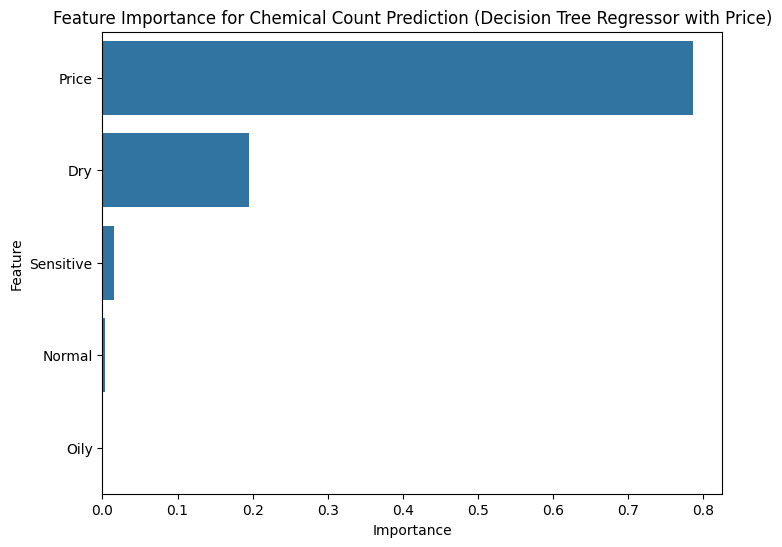

In [ ]:
#similar to ridge regression we will be putting the coefficients into a dataframe:

# Retrieve feature importances from the trained Decision Tree model

feature_importance_tree_price = pd.DataFrame({'Feature': f_price,'Importance': tree_model_price.feature_importances_}).sort_values(by='Importance', ascending=False)

#plotting the graph
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_tree_price)
plt.title('Feature Importance for Chemical Count Prediction (Decision Tree Regressor with Price)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

This tells us that price will be the bigger factor and importance with respect to amount of chemicals in them than skin type as seen above

Let us still try to find a correlation for each skin type with the additional price variable:-

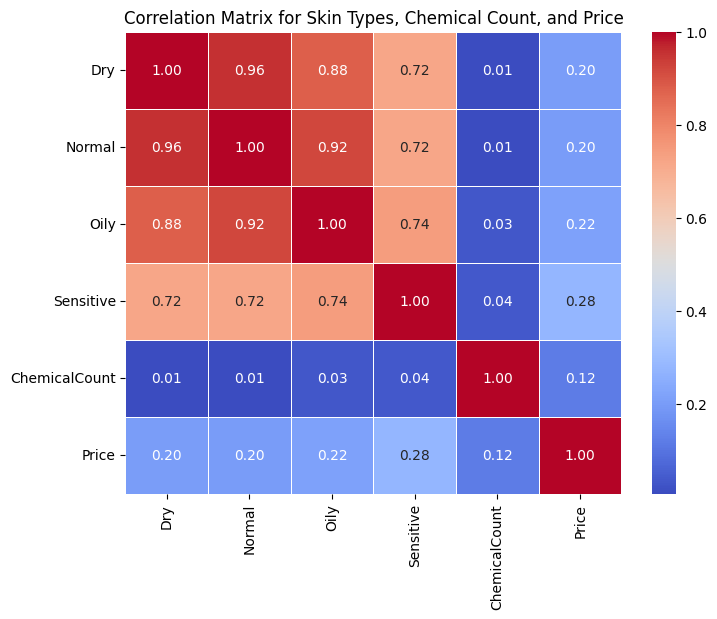

In [ ]:
c = merged_table[['Dry', 'Normal', 'Oily', 'Sensitive', 'ChemicalCount', 'Price']]
matrix = c.corr() #https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/

#plotting the graph
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) #https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title('Correlation Matrix for Skin Types, Chemical Count, and Price')
plt.show()

let us now individually extract values from the correlation matrix:

In [ ]:
skin = matrix['ChemicalCount'][['Dry', 'Normal', 'Oily', 'Sensitive']].sort_values(ascending=False)
skin

,ChemicalCount
Sensitive,0.038058
Oily,0.033608
Dry,0.010007
Normal,0.007437


Result:

This implies that Sensitive skin has the largest coefficient followed by Oily skin